# 方差过滤

In [1]:
#1.导入所需要的库
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import time
import numpy as np
from sklearn.preprocessing import StandardScaler

In [2]:
# 2.导入数据集，探索数据
data = pd.read_csv(r"./example_training_matrix_s6.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Columns: 694 entries, lag1_mean_0 to Label
dtypes: float64(694)
memory usage: 6.1 MB


In [3]:
data.shape

(1143, 694)

In [4]:
data.head()

lag1_mean_0  lag1_mean_1  lag1_mean_2  lag1_mean_d_h2h1_0  \
0    -0.390748     0.155929     0.037948           -1.559179   
1     1.983516    -0.590627     0.080751           -6.060792   
2     0.014061     0.004125    -0.002862           -0.021678   
3     0.503730     0.065160     0.189232           -1.037148   
4    -0.847511     0.532542    -0.290905           -0.986420   

   lag1_mean_d_h2h1_1  lag1_mean_d_h2h1_2  lag1_mean_q1_0  lag1_mean_q1_1  \
0            0.726128            0.067456        0.021016       -0.067293   
1            0.492950            0.438427       11.427360       -3.357250   
2           -0.009081            0.009460        0.064513        0.017684   
3            1.462784            0.372190        2.690860        0.134305   
4           -1.506989            0.246709       -2.345380        0.633855   

   lag1_mean_q1_2  lag1_mean_q2_0  ...  freq_669_2  freq_679_2  freq_689_2  \
0       -0.790253        0.746988  ...    0.001990    0.001915    0.001845   
1        0.813703       -1.230761  ...    0.001486    0.001443    0.001402   
2       -0.011560       -0.013671  ...    0.002740    0.002653    0.002572   
3        0.861019       -0.602342  ...    0.002618    0.002561    0.002508   
4        0.610479        1.584380  ...    0.003014    0.002917    0.002826   

   freq_699_2  freq_709_2  freq_720_2  freq_730_2  freq_740_2  freq_750_2  \
0    0.001779    0.001716    0.001657    0.001601    0.001548    0.001498   
1    0.001364    0.001328    0.001294    0.001262    0.001232    0.001203   
2    0.002495    0.002422    0.002353    0.002288    0.002226    0.002167   
3    0.002456    0.002407    0.002360    0.002315    0.002272    0.002231   
4    0.002740    0.002659    0.002582    0.002509    0.002440    0.002375   

   Label  
0    1.0  
1    0.0  
2    2.0  
3    0.0  
4    0.0  

[5 rows x 694 columns]

In [5]:
data.describe()

lag1_mean_0  lag1_mean_1  lag1_mean_2  lag1_mean_d_h2h1_0  \
count  1143.000000  1143.000000  1143.000000         1143.000000   
mean      0.003466    -0.000959     0.001687           -0.205085   
std       1.963381     1.212042     0.558342            8.650199   
min     -14.623039   -12.799691    -4.858853          -88.122165   
25%      -0.447997    -0.204669    -0.152941           -1.948948   
50%       0.016158     0.006081    -0.001123           -0.195842   
75%       0.462802     0.202746     0.150888            1.307002   
max      14.796281     9.663844     3.009050           41.516528   

       lag1_mean_d_h2h1_1  lag1_mean_d_h2h1_2  lag1_mean_q1_0  lag1_mean_q1_1  \
count         1143.000000         1143.000000     1143.000000     1143.000000   
mean             0.121657           -0.045577       -0.225008        0.057429   
std              3.565567            2.083457        9.548814        4.357574   
min            -31.861971          -13.305756      -81.911824      -29.467346   
25%             -0.620575           -0.630649       -2.013248       -0.821711   
50%              0.070139           -0.128395       -0.002871       -0.040454   
75%              0.719452            0.398317        1.884776        0.770029   
max             21.810934           13.246328       57.831151       52.114593   

       lag1_mean_q1_2  lag1_mean_q2_0  ...   freq_669_2   freq_679_2  \
count     1143.000000     1143.000000  ...  1143.000000  1143.000000   
mean         0.063698        0.428314  ...     0.001446     0.001407   
std          2.085228       10.034454  ...     0.001008     0.000982   
min        -11.665314      -59.259585  ...     0.000021     0.000020   
25%         -0.487052       -1.841079  ...     0.000705     0.000690   
50%          0.031528        0.175699  ...     0.001233     0.001193   
75%          0.551106        1.747522  ...     0.001986     0.001916   
max         14.800827       95.098865  ...     0.005593     0.005467   

        freq_689_2   freq_699_2   freq_709_2   freq_720_2   freq_730_2  \
count  1143.000000  1143.000000  1143.000000  1143.000000  1143.000000   
mean      0.001371     0.001336     0.001303     0.001272     0.001242   
std       0.000958     0.000935     0.000913     0.000892     0.000872   
min       0.000020     0.000019     0.000019     0.000018     0.000018   
25%       0.000674     0.000656     0.000642     0.000630     0.000616   
50%       0.001160     0.001134     0.001104     0.001077     0.001047   
75%       0.001870     0.001829     0.001788     0.001744     0.001701   
max       0.005346     0.005232     0.005124     0.005020     0.004921   

        freq_740_2   freq_750_2        Label  
count  1143.000000  1143.000000  1143.000000  
mean      0.001214     0.001187     0.951006  
std       0.000854     0.000836     0.784736  
min       0.000018     0.000017     0.000000  
25%       0.000603     0.000589     0.000000  
50%       0.001027     0.001002     1.000000  
75%       0.001654     0.001627     2.000000  
max       0.004827     0.004737     2.000000  

[8 rows x 694 columns]

In [6]:
from sklearn.preprocessing import LabelEncoder
y = data.iloc[:,-1]#要输入的是标签，不是特征矩阵，所以允许一维

In [7]:
le = LabelEncoder()  # 实例化
le = le.fit(y) # 导入数据
label = le.transform(y) # transform接口调取数据
le.classes_  #属性.classes_查看标签中究竟有多少类别
label

array([1, 0, 2, ..., 0, 2, 2], dtype=int64)

In [8]:
le.fit_transform(y)  #也可以直接fit_transform一步到位

array([1, 0, 2, ..., 0, 2, 2], dtype=int64)

In [9]:
le.inverse_transform(label)  #使用inverse_transform可以逆转

array([1., 0., 2., ..., 0., 2., 2.])

In [10]:
data.iloc[:,-1] = label  #让标签等于我们运行出来的结果
data.head()


lag1_mean_0  lag1_mean_1  lag1_mean_2  lag1_mean_d_h2h1_0  \
0    -0.390748     0.155929     0.037948           -1.559179   
1     1.983516    -0.590627     0.080751           -6.060792   
2     0.014061     0.004125    -0.002862           -0.021678   
3     0.503730     0.065160     0.189232           -1.037148   
4    -0.847511     0.532542    -0.290905           -0.986420   

   lag1_mean_d_h2h1_1  lag1_mean_d_h2h1_2  lag1_mean_q1_0  lag1_mean_q1_1  \
0            0.726128            0.067456        0.021016       -0.067293   
1            0.492950            0.438427       11.427360       -3.357250   
2           -0.009081            0.009460        0.064513        0.017684   
3            1.462784            0.372190        2.690860        0.134305   
4           -1.506989            0.246709       -2.345380        0.633855   

   lag1_mean_q1_2  lag1_mean_q2_0  ...  freq_669_2  freq_679_2  freq_689_2  \
0       -0.790253        0.746988  ...    0.001990    0.001915    0.001845   
1        0.813703       -1.230761  ...    0.001486    0.001443    0.001402   
2       -0.011560       -0.013671  ...    0.002740    0.002653    0.002572   
3        0.861019       -0.602342  ...    0.002618    0.002561    0.002508   
4        0.610479        1.584380  ...    0.003014    0.002917    0.002826   

   freq_699_2  freq_709_2  freq_720_2  freq_730_2  freq_740_2  freq_750_2  \
0    0.001779    0.001716    0.001657    0.001601    0.001548    0.001498   
1    0.001364    0.001328    0.001294    0.001262    0.001232    0.001203   
2    0.002495    0.002422    0.002353    0.002288    0.002226    0.002167   
3    0.002456    0.002407    0.002360    0.002315    0.002272    0.002231   
4    0.002740    0.002659    0.002582    0.002509    0.002440    0.002375   

   Label  
0      1  
1      0  
2      2  
3      0  
4      0  

[5 rows x 694 columns]

In [11]:
print(data.columns)

Index(['lag1_mean_0', 'lag1_mean_1', 'lag1_mean_2', 'lag1_mean_d_h2h1_0',
       'lag1_mean_d_h2h1_1', 'lag1_mean_d_h2h1_2', 'lag1_mean_q1_0',
       'lag1_mean_q1_1', 'lag1_mean_q1_2', 'lag1_mean_q2_0',
       ...
       'freq_669_2', 'freq_679_2', 'freq_689_2', 'freq_699_2', 'freq_709_2',
       'freq_720_2', 'freq_730_2', 'freq_740_2', 'freq_750_2', 'Label'],
      dtype='object', length=694)


In [12]:
data['Label']

0       1
1       0
2       2
3       0
4       0
       ..
1138    2
1139    1
1140    0
1141    2
1142    2
Name: Label, Length: 1143, dtype: int64

In [13]:
data.shape

(1143, 694)

In [14]:
x = data.iloc[:,0:85]
x.head()

lag1_mean_0  lag1_mean_1  lag1_mean_2  lag1_mean_d_h2h1_0  \
0    -0.390748     0.155929     0.037948           -1.559179   
1     1.983516    -0.590627     0.080751           -6.060792   
2     0.014061     0.004125    -0.002862           -0.021678   
3     0.503730     0.065160     0.189232           -1.037148   
4    -0.847511     0.532542    -0.290905           -0.986420   

   lag1_mean_d_h2h1_1  lag1_mean_d_h2h1_2  lag1_mean_q1_0  lag1_mean_q1_1  \
0            0.726128            0.067456        0.021016       -0.067293   
1            0.492950            0.438427       11.427360       -3.357250   
2           -0.009081            0.009460        0.064513        0.017684   
3            1.462784            0.372190        2.690860        0.134305   
4           -1.506989            0.246709       -2.345380        0.633855   

   lag1_mean_q1_2  lag1_mean_q2_0  ...  lag1_min_d_q1q3_0  lag1_min_d_q1q3_1  \
0       -0.790253        0.746988  ...          -1.768737          11.400090   
1        0.813703       -1.230761  ...         -78.704984        -111.968577   
2       -0.011560       -0.013671  ...          -0.721855          -0.394257   
3        0.861019       -0.602342  ...         -12.316020         -17.633925   
4        0.610479        1.584380  ...         -27.924291          42.017559   

   lag1_min_d_q1q3_2  lag1_min_d_q1q4_0  lag1_min_d_q1q4_1  lag1_min_d_q1q4_2  \
0          16.243071           2.276067          10.684414           2.441117   
1         -75.984419        -120.993665        -100.152380         -64.230887   
2          -0.274608          -0.830705          -0.424265          -0.244113   
3           7.669772          13.191961         -12.231313          38.002732   
4           6.368946           8.659816          28.266176          24.114335   

   lag1_min_d_q2q3_0  lag1_min_d_q2q3_1  lag1_min_d_q2q3_2  lag1_min_d_q2q4_0  
0           5.515083          -7.229683           3.044283           9.559887  
1          18.858276         -25.506112         -40.283395         -23.430406  
2           0.032733          -0.059185          -0.076267          -0.076116  
3           1.575142         -13.662234          16.535189          27.083124  
4         -50.106217          32.401625         -13.098124         -13.522110  

[5 rows x 85 columns]

In [15]:
x.describe()

lag1_mean_0  lag1_mean_1  lag1_mean_2  lag1_mean_d_h2h1_0  \
count  1143.000000  1143.000000  1143.000000         1143.000000   
mean      0.003466    -0.000959     0.001687           -0.205085   
std       1.963381     1.212042     0.558342            8.650199   
min     -14.623039   -12.799691    -4.858853          -88.122165   
25%      -0.447997    -0.204669    -0.152941           -1.948948   
50%       0.016158     0.006081    -0.001123           -0.195842   
75%       0.462802     0.202746     0.150888            1.307002   
max      14.796281     9.663844     3.009050           41.516528   

       lag1_mean_d_h2h1_1  lag1_mean_d_h2h1_2  lag1_mean_q1_0  lag1_mean_q1_1  \
count         1143.000000         1143.000000     1143.000000     1143.000000   
mean             0.121657           -0.045577       -0.225008        0.057429   
std              3.565567            2.083457        9.548814        4.357574   
min            -31.861971          -13.305756      -81.911824      -29.467346   
25%             -0.620575           -0.630649       -2.013248       -0.821711   
50%              0.070139           -0.128395       -0.002871       -0.040454   
75%              0.719452            0.398317        1.884776        0.770029   
max             21.810934           13.246328       57.831151       52.114593   

       lag1_mean_q1_2  lag1_mean_q2_0  ...  lag1_min_d_q1q3_0  \
count     1143.000000     1143.000000  ...        1143.000000   
mean         0.063698        0.428314  ...           0.883361   
std          2.085228       10.034454  ...         171.574239   
min        -11.665314      -59.259585  ...        -825.565241   
25%         -0.487052       -1.841079  ...         -26.249304   
50%          0.031528        0.175699  ...          -1.725105   
75%          0.551106        1.747522  ...          22.217736   
max         14.800827       95.098865  ...        1488.844765   

       lag1_min_d_q1q3_1  lag1_min_d_q1q3_2  lag1_min_d_q1q4_0  \
count        1143.000000        1143.000000        1143.000000   
mean           -6.832433          -2.798359          -2.733587   
std           126.309267          98.752270         162.755363   
min          -947.762251        -506.635224        -717.487072   
25%           -21.330469         -19.231549         -26.780223   
50%            -0.858163          -1.650583           0.641878   
75%            16.951610          17.172893          24.936699   
max           652.954108         569.953415        1211.887975   

       lag1_min_d_q1q4_1  lag1_min_d_q1q4_2  lag1_min_d_q2q3_0  \
count        1143.000000        1143.000000        1143.000000   
mean           -0.499728          -7.648067          -3.272081   
std           153.296997          94.948597         152.913809   
min          -728.053893        -739.602793       -1040.781009   
25%           -20.095346         -19.236242         -26.255118   
50%            -0.008201          -0.996265          -1.508175   
75%            18.415672          17.674110          20.346216   
max          1383.806153         484.311016        1099.572238   

       lag1_min_d_q2q3_1  lag1_min_d_q2q3_2  lag1_min_d_q2q4_0  
count        1143.000000        1143.000000        1143.000000  
mean           -9.493679          -1.952703          -6.889028  
std           105.683142          82.093957         172.767499  
min         -1071.919995        -595.568611        -971.562261  
25%           -20.599876         -15.328995         -21.966759  
50%            -2.106095          -0.858152          -0.695027  
75%            10.882958          13.454953          24.638562  
max           674.884560         559.149710        1270.378143  

[8 rows x 85 columns]

In [16]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(x,y,test_size=0.2,random_state=10)
print(Xtrain.shape,Xtest.shape,Ytrain.shape,Ytest.shape)

(914, 85) (229, 85) (914,) (229,)


KNeighborsClassifier
****Results****
Accuracy: 77.2926%
Log Loss: 2.6311223551043113
SVC
****Results****
Accuracy: 74.2358%
Log Loss: 0.6429535107986665
NuSVC
****Results****
Accuracy: 77.2926%
Log Loss: 0.6412453258741179
RandomForestClassifier
****Results****
Accuracy: 91.2664%
Log Loss: 0.29081514770559025
LinearDiscriminantAnalysis
****Results****
Accuracy: 62.4454%
Log Loss: 0.9187550622967852
QuadraticDiscriminantAnalysis
****Results****
Accuracy: 75.9825%
Log Loss: 6.582249018385355


c:\users\123\anaconda3\envs\mne\lib\site-packages\sklearn\discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


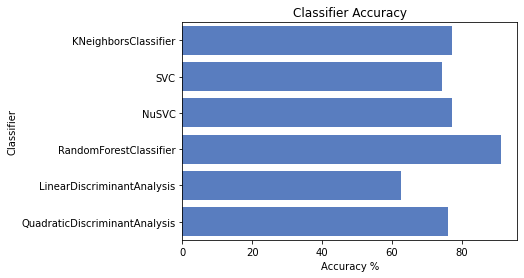

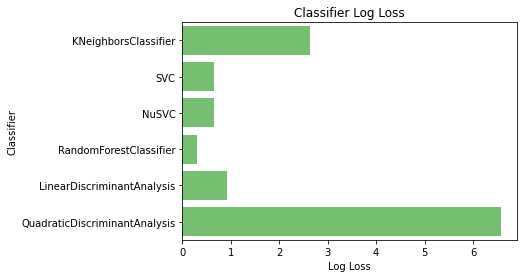

In [17]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier  # k近邻算法
from sklearn.svm import SVC, LinearSVC, NuSVC   #支持向量机分类器、线性支持向量机分类器、核支持向量分类
from sklearn.tree import DecisionTreeClassifier   # 决策树
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier   # 随机森林、AdaBoost、GradientBoost
from sklearn.naive_bayes import GaussianNB    #朴素贝叶斯GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis   #线性判别分析
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis   #二次判别分析
import pandas as pd
import seaborn as sns

classifiers = [
    KNeighborsClassifier(2),
    SVC(kernel="rbf",probability=True),
    NuSVC(probability=True),
#     DecisionTreeClassifier(),
    RandomForestClassifier(),
#     AdaBoostClassifier(),
#     GradientBoostingClassifier(),
#     GaussianNB(),
    LinearDiscriminantAnalysis(solver='svd'),
    QuadraticDiscriminantAnalysis()]

# 结果可视化
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(Xtrain, Ytrain)
    name = clf.__class__.__name__

    print("="*30)
    print(name)

    print('****Results****')
    train_predictions = clf.predict(Xtest)
    acc = accuracy_score(Ytest, train_predictions)
    print("Accuracy: {:.4%}".format(acc))

    train_predictions = clf.predict_proba(Xtest)
    ll = log_loss(Ytest, train_predictions)
    print("Log Loss: {}".format(ll))

    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)

print("="*30)
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()

In [18]:
import xgboost as xgb
from sklearn.pipeline import Pipeline

In [19]:

pl_xgb = Pipeline(steps=
                  [('xgboost', xgb.XGBClassifier(objective='multi:softmax'))])
scores = cross_val_score(pl_xgb, data_, label, cv=10)
print('Accuracy for XGBoost Classifier : ', scores.mean())

NameError: name 'data_' is not defined

# ---------------------------分割线-----------------------------

# Embedded嵌入法

In [20]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as RFC

In [21]:
RFC_ = RFC(n_estimators=10,random_state=0)  # 随机森林实例化

In [26]:
x = data_.iloc[:,:-2]
y = data_.iloc[:,-1]
x.shape

(2132, 2547)

* 阈值为0.005

In [48]:
x_embedded = SelectFromModel(RFC_,threshold=0.005).fit_transform(x,y)
#在这里我只想取出来有限的特征。0.005这个阈值对于有780个特征的数据来说，是非常高的阈值，因为平均每个特征
# 只能够分到大约0.001的feature_importances_

In [49]:
x_embedded.shape
#模型的维度明显被降低了
#同样的，我们也可以画学习曲线来找最佳阈值

(2132, 27)

In [50]:
RFC_.fit(x,y).feature_importances_

array([0.04776431, 0.        , 0.00700813, ..., 0.        , 0.        ,
       0.        ])

In [51]:
(RFC_.fit(x,y).feature_importances_).max()

0.08274490047641901

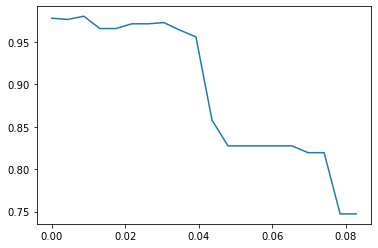

In [31]:
# 绘制学习曲线
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
RFC_.fit(x,y).feature_importances_
threshold = np.linspace(0,(RFC_.fit(x,y).feature_importances_).max(),20)
#0 - feature_importances_ 范围中取20个数

score = []
for i in threshold:
    x_embedded = SelectFromModel(RFC_,threshold=i).fit_transform(x,y) # 随机森林实例化
    once = cross_val_score(RFC_,x_embedded,y,cv=5).mean()  # 交叉验证5次
    score.append(once)
plt.plot(threshold,score)
plt.show()

In [32]:
threshold

array([0.        , 0.00435499, 0.00870999, 0.01306498, 0.01741998,
       0.02177497, 0.02612997, 0.03048496, 0.03483996, 0.03919495,
       0.04354995, 0.04790494, 0.05225994, 0.05661493, 0.06096993,
       0.06532492, 0.06967992, 0.07403491, 0.07838991, 0.0827449 ])

In [33]:
x_embedded = SelectFromModel(RFC_,threshold=0.00870999).fit_transform(x,y)

In [34]:
x_embedded.shape

(2132, 22)

In [35]:
cross_val_score(RFC_,x_embedded,y,cv=5).mean()

0.9803003815241172

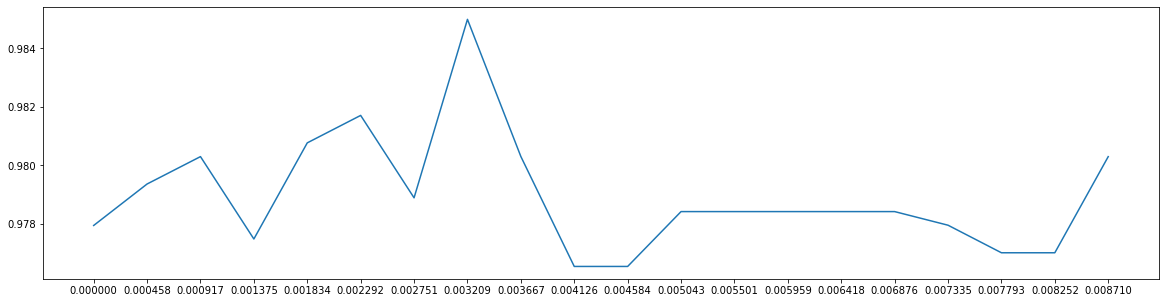

In [36]:
# 确定准确率最高threshold值


score2 = []
for i in np.linspace(0,0.00870999,20):
    x_embedded = SelectFromModel(RFC_,threshold=i).fit_transform(x,y)
    once = cross_val_score(RFC_,x_embedded,y,cv=5).mean()
    score2.append(once)
plt.figure(figsize=[20,5])
plt.plot(np.linspace(0,0.00870999,20),score2)
plt.xticks(np.linspace(0,0.00870999,20))
plt.show()

In [37]:
x_embedded = SelectFromModel(RFC_,threshold=0.003209).fit_transform(x,y)

In [38]:
x_embedded.shape

(2132, 37)

In [39]:
cross_val_score(RFC_,x_embedded,y,cv=5).mean()

0.9849897197392001

In [40]:
cross_val_score(RFC(n_estimators=100,random_state=0),x_embedded,y,cv=5).mean()

0.9845224351573924

* 阈值为0.001

In [41]:
x_embedded = SelectFromModel(RFC_,threshold=0.001).fit_transform(x,y)
#在这里我只想取出来有限的特征。0.005这个阈值对于有780个特征的数据来说，是非常高的阈值，因为平均每个特征
# 只能够分到大约0.001的feature_importances_

In [42]:
x_embedded.shape

(2132, 85)

In [52]:
RFC_.fit(x,y).feature_importances_

array([0.04776431, 0.        , 0.00700813, ..., 0.        , 0.        ,
       0.        ])

In [53]:
(RFC_.fit(x,y).feature_importances_).max()

0.08274490047641901

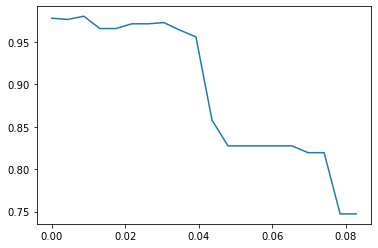

In [54]:
# 绘制学习曲线
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
RFC_.fit(x,y).feature_importances_
threshold = np.linspace(0,(RFC_.fit(x,y).feature_importances_).max(),20)
#0 - feature_importances_ 范围中取20个数

score = []
for i in threshold:
    x_embedded = SelectFromModel(RFC_,threshold=i).fit_transform(x,y) # 随机森林实例化
    once = cross_val_score(RFC_,x_embedded,y,cv=5).mean()  # 交叉验证5次
    score.append(once)
plt.plot(threshold,score)
plt.show()

In [55]:
threshold

array([0.        , 0.00435499, 0.00870999, 0.01306498, 0.01741998,
       0.02177497, 0.02612997, 0.03048496, 0.03483996, 0.03919495,
       0.04354995, 0.04790494, 0.05225994, 0.05661493, 0.06096993,
       0.06532492, 0.06967992, 0.07403491, 0.07838991, 0.0827449 ])

# Wrapper包装法

In [62]:
from sklearn.feature_selection import RFE
RFC_ = RFC(n_estimators=10,random_state=0)
selector = RFE(RFC_,n_features_to_select=22,step=5).fit(x,y)  # 每迭代一次删除掉50个特征

In [63]:
selector.support_.sum() #.support_：返回所有的特征的是否最后被选中的布尔矩阵

22

In [64]:
selector.ranking_   #返回特征的按数次迭代中综合重要性的排名,越重要的特征排在前面

array([502, 499, 492, ..., 480, 481, 482])

In [65]:
x_wrapper = selector.transform(x)

In [66]:
cross_val_score(RFC_,x_wrapper,y,cv=5).mean()

0.979362513881101

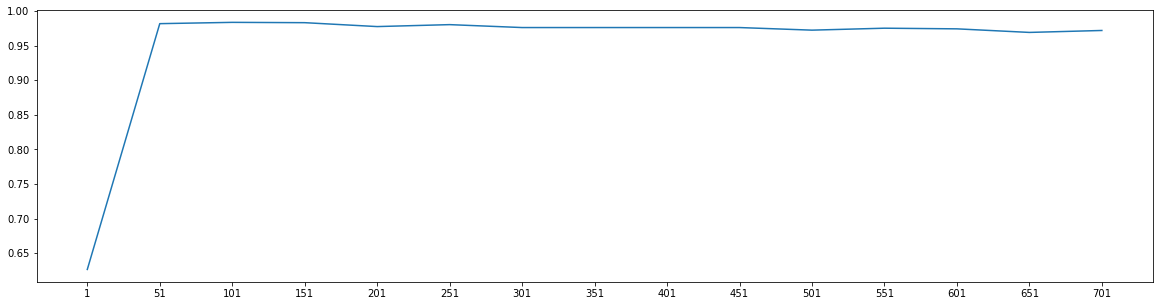

In [68]:
# 绘制学习曲线
score = []
for i in range(1,751,50):
    x_wrapper = RFE(RFC_,n_features_to_select=i, step=50).fit_transform(x,y)
    once = cross_val_score(RFC_,x_wrapper,y,cv=5).mean()
    score.append(once)
plt.figure(figsize=[20,5])
plt.plot(range(1,751,50),score)
plt.xticks(range(1,751,50))
plt.show()